In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# ! pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## ws_11_1

In [ ]:
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# %%
df = pd.read_csv('data/data_ws_1.csv')
# "Commute_Time" 열만 추출해 Series로 만듦
commute_times = df['Commute_Time']

# 기초 통계량 확인
mean_commute = np.mean(commute_times) # 표본 평균
std_commute = np.std(commute_times, ddof=1) # 표본 표준편차

print(f"표본 평균 통근 시간: {mean_commute:.2f}분")
print(f"표본 표준편차 : {std_commute:.2f}분")
df.head()

표본 평균 통근 시간: 36.06분
표본 표준편차 : 4.50분


,Commute_Time
0,39.483571
1,36.308678
2,40.238443
3,44.615149
4,35.829233


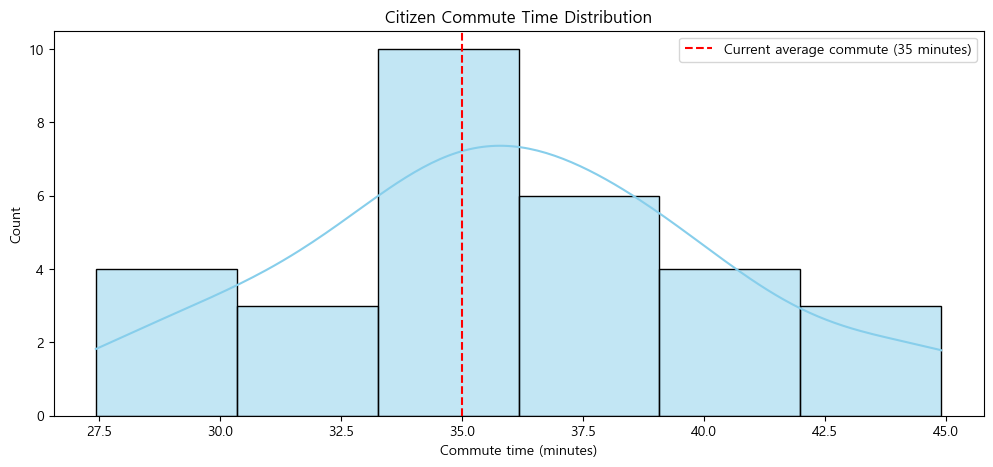

In [5]:
# %%
plt.figure(figsize=(12, 5))
# 그래프 크기 설정 (가로, 세로)

plt.subplot(1, 1, 1)  
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

sns.histplot(commute_times, kde=True, color='skyblue')  
# 히스토그램과 커널 밀도 추정(KDE)을 함께 표시

plt.axvline(x=35, color='red', linestyle='dashed', label='Current average commute (35 minutes)')
# 특정 값을 기준으로 수직선 추가 (예: 기존 평균 통근 시간)

plt.title('Citizen Commute Time Distribution')  
# 그래프 제목 설정

plt.xlabel('Commute time (minutes)')  
# X축 라벨 설정

plt.legend()  
# 범례 표시

plt.show()  
# 그래프 출력

In [6]:
# %%
# 데이터 정규성 검정을 위한 Shapiro-Wilk 검정 수행
stat, p = stats.shapiro(commute_times)  
# commute_times 데이터의 정규성을 검정하는 함수

print(f"Shapiro-Wilk 검정 p-value : {p:.4}")
# p-value가 0.05보다 작으면 정규성을 따르지 않는다고 판단

# %%
# 기존 평균 통근 시간(35분)과 비교하여 t-검정 수행
t_stat, p_value = stats.ttest_1samp(commute_times, popmean=35)  
# 단일 표본 t-검정 수행 (popmean에 기존 평균 입력)

print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
# p-value가 0.05보다 작으면 기존 평균과 통계적으로 유의미한 차이가 있다고 판단

Shapiro-Wilk 검정 p-value : 0.6868
t-통계량: 1.2893
p-value: 0.2075


## ws_11_2
### 사전-사후 통근 시간 비교

In [7]:
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data_ws_2.csv')

# "Commute_Time" 열만 추출해 Series로 만듦
commute_before = df['commute_before']
commute_after = df['commute_after']


# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")
print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")
df.head()

도입 전 평균 통근 시간: 37.06분
도입 후 평균 통근 시간: 33.39분


,commute_before,commute_after
0,40.483571,30.991467
1,37.308678,43.261391
2,41.238443,33.932514
3,45.615149,28.711445
4,36.829233,38.112725


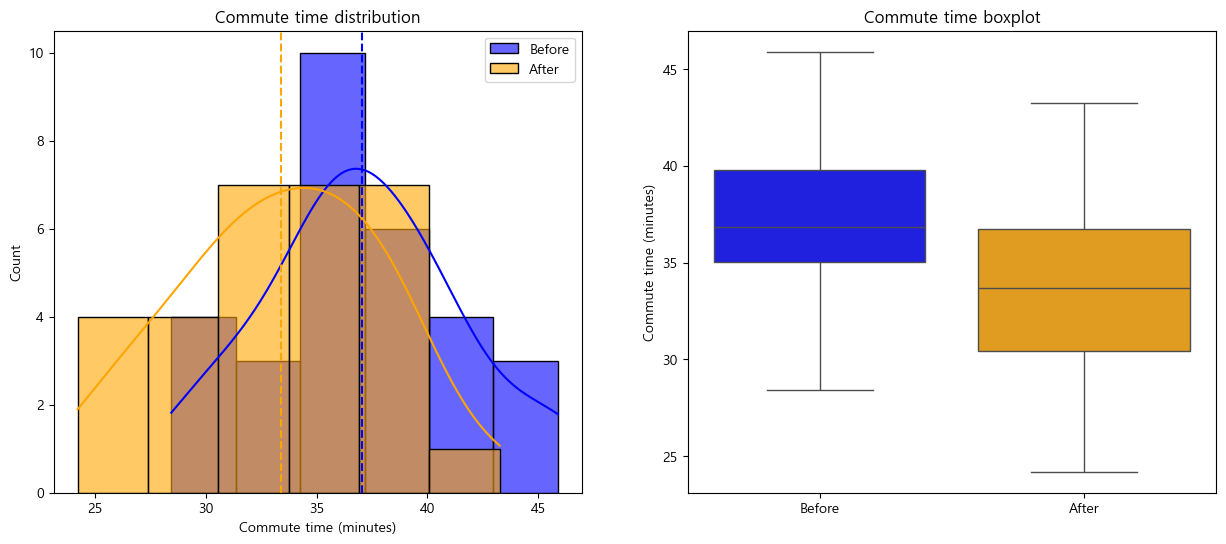

In [8]:
# %%
plt.figure(figsize=(15, 6))
# 그래프 크기 설정

# KDE 그래프: 통근 시간 분포 비교
plt.subplot(1, 2, 1)  
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

sns.histplot(commute_before, kde=True, color='blue', label='Before', alpha=0.6)  
# KDE 포함 여부 설정

sns.histplot(commute_after, kde=True, color='orange', label='After', alpha=0.6)  

plt.axvline(np.mean(commute_before), color='blue', linestyle='dashed')  
# 도입 전 평균선 추가

plt.axvline(np.mean(commute_after), color='orange', linestyle='dashed')  
# 도입 후 평균선 추가

plt.title('Commute time distribution')  
plt.xlabel('Commute time (minutes)')  
plt.legend()

# 박스플롯: 그룹 간 비교
plt.subplot(1, 2, 2)  

sns.boxplot(data=[commute_before, commute_after], palette=['blue', 'orange'])  
# 데이터 리스트를 입력하여 박스플롯 생성

plt.xticks([0, 1], ['Before', 'After'])  
plt.title('Commute time boxplot')  
plt.ylabel('Commute time (minutes)')

plt.show()

In [9]:
# %%
shapiro_before = stats.shapiro(commute_before)  
# 정규성 검정 함수

shapiro_after = stats.shapiro(commute_after)  

print(f"Shapiro-Wilk 검정 (도입 전) p-value: {shapiro_before.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (도입 후) p-value: {shapiro_after.pvalue:.4f}")  

# %%
levene_test = stats.levene(commute_before, commute_after)  
# 등분산 검정 함수

print(f"Levene’s 등분산 검정 p-value: {levene_test.pvalue:.4f}")  

# %%
t_stat, p_value = stats.ttest_ind(commute_before, commute_after, equal_var=True)  
# 독립 표본 t-검정 수행, equal_var 여부 입력

print(f"t-통계량: {t_stat:.4f}")  
print(f"p-value: {p_value:.4f}")  

Shapiro-Wilk 검정 (도입 전) p-value: 0.6868
Shapiro-Wilk 검정 (도입 후) p-value: 0.9130
Levene’s 등분산 검정 p-value: 0.6223
t-통계량: 3.1004
p-value: 0.0030


## ws_11_3
### 동일한 시민의 교통 시스템 도입 전후 통근 시간 변화
#### 정규성 검정과 대응표본 t-검정 수행

In [10]:
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data_ws_2.csv')

commute_before = df['commute_before']
commute_after = df['commute_after']

# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")
print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")
df.head()

도입 전 평균 통근 시간: 37.06분
도입 후 평균 통근 시간: 33.39분


,commute_before,commute_after
0,40.483571,30.991467
1,37.308678,43.261391
2,41.238443,33.932514
3,45.615149,28.711445
4,36.829233,38.112725


In [11]:

# %%
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성: 동일한 시민들의 교통 시스템 도입 전후 통근 시간 (단위: 분)
np.random.seed(42)

commute_before = np.random.normal(loc=40, scale=5, size=100)  
# 도입 전 평균, 표준편차, 표본 크기를 입력

commute_after = np.random.normal(loc=35, scale=5, size=100)  
# 도입 후 평균, 표준편차, 표본 크기를 입력

# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")  
# 평균 계산

print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")  
# 평균 계산

도입 전 평균 통근 시간: 39.48분
도입 후 평균 통근 시간: 35.11분


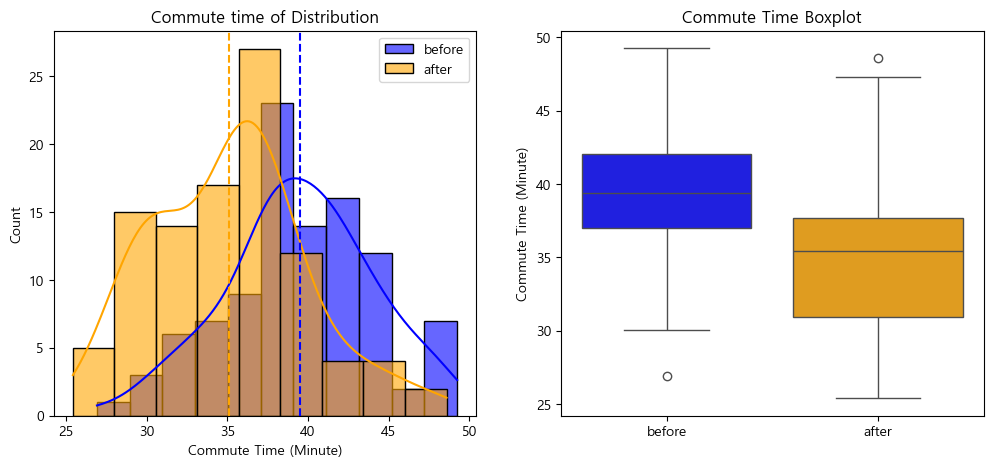

In [12]:
# %%
plt.figure(figsize=(12, 5))
# 그래프 크기 설정 (가로, 세로)

# KDE 그래프: 통근 시간 분포 비교
plt.subplot(1, 2, 1)  
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

sns.histplot(commute_before, kde=True, color='blue', label='before', alpha=0.6)  
# KDE 포함 여부 설정

sns.histplot(commute_after, kde=True, color='orange', label='after', alpha=0.6)  

plt.axvline(np.mean(commute_before), color='blue', linestyle='dashed')  
# 도입 전 평균선 추가

plt.axvline(np.mean(commute_after), color='orange', linestyle='dashed')  
# 도입 후 평균선 추가

plt.title('Commute time of Distribution')  
plt.xlabel('Commute Time (Minute)')  
plt.legend()

# 박스플롯: 그룹 간 비교
plt.subplot(1, 2, 2)  

sns.boxplot(data=[commute_before, commute_after], palette=['blue', 'orange'])  
# 데이터 리스트를 입력하여 박스플롯 생성

plt.xticks([0, 1], ['before', 'after'])  
plt.title('Commute Time Boxplot')  
plt.ylabel('Commute Time (Minute)')

plt.show()

In [13]:
# %%
shapiro_before = stats.shapiro(commute_before)  
# 정규성 검정 함수

shapiro_after = stats.shapiro(commute_after)  

print(f"Shapiro-Wilk 검정 (도입 전) p-value: {shapiro_before.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (도입 후) p-value: {shapiro_after.pvalue:.4f}")  

# %%
# 대응표본 t-검정 수행
paired_t_stat, p_value = stats.ttest_rel(commute_before, commute_after)  
# 대응표본 t-검정 함수 사용

print(f"대응표본 t-검정 t-통계량: {paired_t_stat:.4f}")  
print(f"p-value: {p_value:.4f}")  

Shapiro-Wilk 검정 (도입 전) p-value: 0.6552
Shapiro-Wilk 검정 (도입 후) p-value: 0.0853
대응표본 t-검정 t-통계량: 6.2250
p-value: 0.0000


## ws_11_4
### 세 교통 시스템(A, B, C)에 따른 통근 시간 차이를 분석

In [21]:
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기: 세 개의 서로 다른 교통 시스템(A, B, C)을 이용하는 시민들의 통근 시간 (단위: 분)
# 시스템 A 평균 38분, 표준편차 5분
# 시스템 B 평균 35분, 표준편차 5분
# 시스템 C 평균 33분, 표준편차 5분
df = pd.read_csv('data/data_ws_4.csv')

commute_A = df['commute_A']
commute_B = df['commute_B']
commute_C = df['commute_C']

# 리스트로 데이터 결합
data = {'System': ['A']*30 + ['B']*30 + ['C']*30,
        'Commute_Time': np.concatenate([commute_A, commute_B, commute_C])}

# 기초 통계량 확인
print(f"시스템 A 평균 통근 시간: {np.mean(commute_A):.2f}분")
print(f"시스템 B 평균 통근 시간: {np.mean(commute_B):.2f}분")
print(f"시스템 C 평균 통근 시간: {np.mean(commute_C):.2f}분")
df.head()

시스템 A 평균 통근 시간: 37.06분
시스템 B 평균 통근 시간: 34.39분
시스템 C 평균 통근 시간: 33.06분


,commute_A,commute_B,commute_C
0,40.483571,31.991467,30.604129
1,37.308678,44.261391,32.071705
2,41.238443,34.932514,27.468325
3,45.615149,29.711445,27.018967
4,36.829233,39.112725,37.062629


In [22]:
# %%
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성: 세 개의 서로 다른 교통 시스템(A, B, C)을 이용하는 시민들의 통근 시간 (단위: 분)
np.random.seed(42)  # 랜덤 시드 설정 (재현 가능성 보장)

commute_A = np.random.normal(loc=38, scale=5, size=30)  
# 시스템 A의 평균, 표준편차, 데이터 개수 입력

commute_B = np.random.normal(loc=35, scale=5, size=30)  
# 시스템 B의 평균, 표준편차, 데이터 개수 입력

commute_C = np.random.normal(loc=33, scale=5, size=30)  
# 시스템 C의 평균, 표준편차, 데이터 개수 입력

# 리스트로 데이터 결합
data = {'System': ['A']*30 + ['B']*30 + ['C']*30,
        'Commute_Time': np.concatenate([commute_A, commute_B, commute_C])}  
# 데이터를 합쳐 하나의 리스트로 변환

# 기초 통계량 확인
print(f"시스템 A 평균 통근 시간: {np.mean(commute_A):.2f}분")  
# 평균 계산

print(f"시스템 B 평균 통근 시간: {np.mean(commute_B):.2f}분")  
# 평균 계산

print(f"시스템 C 평균 통근 시간: {np.mean(commute_C):.2f}분")  
# 평균 계산

data

시스템 A 평균 통근 시간: 37.06분
시스템 B 평균 통근 시간: 34.39분
시스템 C 평균 통근 시간: 33.06분


{'System': ['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C'],
 'Commute_Time': array([40.48357077, 37.30867849, 41.23844269, 45.61514928, 36.82923313,
        36.82931522, 45.89606408, 41.83717365, 35.65262807, 40.71280022,
        35.68291154, 35.67135123, 39.20981136, 28.43359878, 29.37541084,
        35.18856235, 32.9358444 , 39.57123666, 33.45987962, 30.93848149,
        45.32824384, 36.8711185 , 38.33764102, 30.8

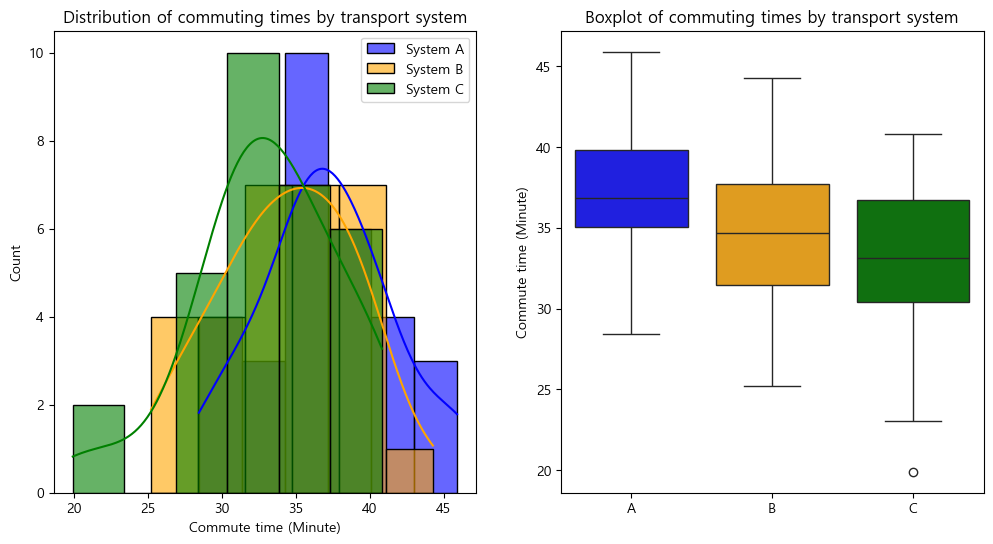

In [18]:
# %%
plt.figure(figsize=(12, 6))
# 그래프 크기 설정

# KDE 그래프: 각 교통 시스템의 통근 시간 분포 비교
plt.subplot(1, 2, 1)  
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

# KDE 포함 여부 설정
sns.histplot(commute_A, kde=True, color='blue', label='System A', alpha=0.6)  
sns.histplot(commute_B, kde=True, color='orange', label='System B', alpha=0.6)  
sns.histplot(commute_C, kde=True, color='green', label='System C', alpha=0.6)  

plt.title('Distribution of commuting times by transport system')  
plt.xlabel('Commute time (Minute)')  
plt.legend()

# 박스플롯: 각 그룹의 분포와 이상치 탐색
plt.subplot(1, 2, 2)  

sns.boxplot(x=data['System'], y=data['Commute_Time'], palette=['blue', 'orange', 'green'])  
# 그룹별 박스플롯 생성 (x축: System, y축: Commute_Time)

plt.title('Boxplot of commuting times by transport system')  
plt.ylabel('Commute time (Minute)')

plt.show()

In [19]:
# %%
# 각 그룹의 정규성 검정 수행
shapiro_A = stats.shapiro(commute_A)  
# 정규성 검정 함수

shapiro_B = stats.shapiro(commute_B)  
shapiro_C = stats.shapiro(commute_C)  

print(f"Shapiro-Wilk 검정 (시스템 A) p-value: {shapiro_A.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (시스템 B) p-value: {shapiro_B.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (시스템 C) p-value: {shapiro_C.pvalue:.4f}")  

# 등분산 검정 수행
levene_test = stats.levene(commute_A, commute_B, commute_C)  
# 등분산 검정 함수

print(f"Levene’s 등분산 검정 p-value: {levene_test.pvalue:.4f}")  

# %%
# 일원분산분석(ANOVA) 수행
anova_result = stats.f_oneway(commute_A, commute_B, commute_C)  
# 일원분산분석 함수 사용

print(f"F-통계량: {anova_result.statistic:.4f}")  
print(f"p-value: {anova_result.pvalue:.4f}")  


Shapiro-Wilk 검정 (시스템 A) p-value: 0.6868
Shapiro-Wilk 검정 (시스템 B) p-value: 0.9130
Shapiro-Wilk 검정 (시스템 C) p-value: 0.3654
Levene’s 등분산 검정 p-value: 0.8627
F-통계량: 5.5986
p-value: 0.0052


## ws_11_5
### 교통 시스템(A, B, C)과 지역(도심, 외곽)에 따른 통근 시간 분석
#### 이원분산분석(ANOVA)

In [23]:
# %%
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기: 교통 시스템(A, B, C)과 지역(도심, 외곽)에 따른 통근 시간
df = pd.read_csv('data/data_ws_5.csv')


# 기초 통계량 확인
df.groupby(['System', 'Location'])['Commute_Time'].describe()

count       mean       std        min        25%        50%  \
System Location                                                                
A      Suburban   30.0  41.394188  4.655511  32.201649  38.454432  41.677136   
       Urban      30.0  39.059266  4.500032  30.433599  37.044746  38.829274   
B      Suburban   30.0  38.898742  4.544110  29.406144  37.101201  38.846936   
       Urban      30.0  37.064424  4.959915  23.901274  34.429290  37.128053   
C      Suburban   30.0  38.393933  4.736830  31.043483  34.119086  38.424408   
       Urban      30.0  34.525209  5.120802  26.962584  30.136208  35.420536   

                       75%        max  
System Location                        
A      Suburban  44.723309  51.261391  
       Urban     41.801677  47.896064  
B      Suburban  40.436770  51.316211  
       Urban     40.688556  44.823218  
C      Suburban  41.066581  50.600846  
       Urban     37.853141  45.952278

In [25]:
df

,System,Location,Commute_Time
0,A,Urban,42.483571
1,A,Urban,39.308678
2,A,Urban,43.238443
3,A,Urban,47.615149
4,A,Urban,38.829233
...,...,...,...
175,C,Suburban,41.135916
176,C,Suburban,37.065009
177,C,Suburban,44.267670
178,C,Suburban,35.676716


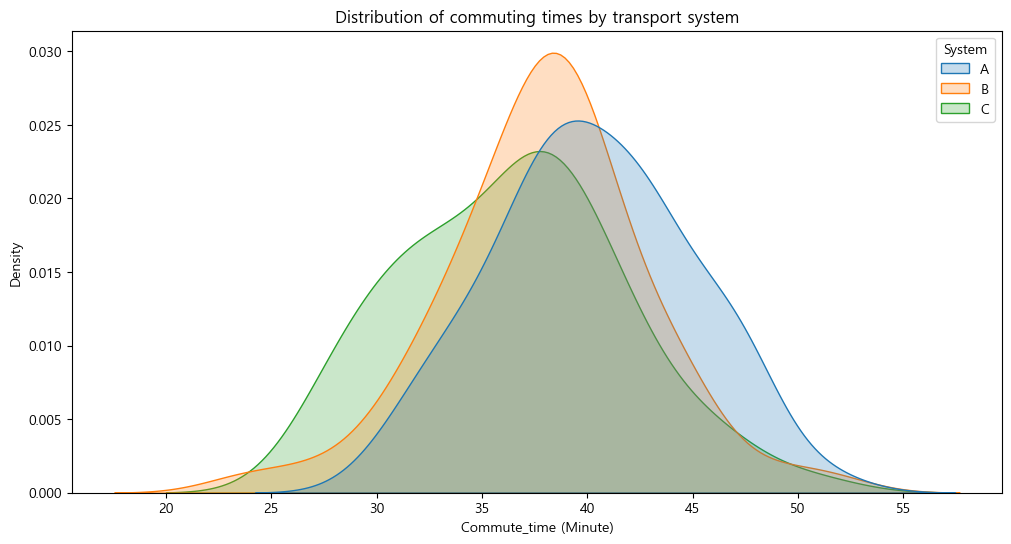

In [26]:
# %%
plt.figure(figsize=(12, 6))
# 그래프 크기 설정

# KDE 그래프
sns.kdeplot(data=df, x='Commute_Time', hue='System', fill=True)  
# 데이터 프레임에서 x축 변수와 그룹 구분 변수 설정

plt.title('Distribution of commuting times by transport system')
plt.xlabel('Commute_time (Minute)')
plt.show()

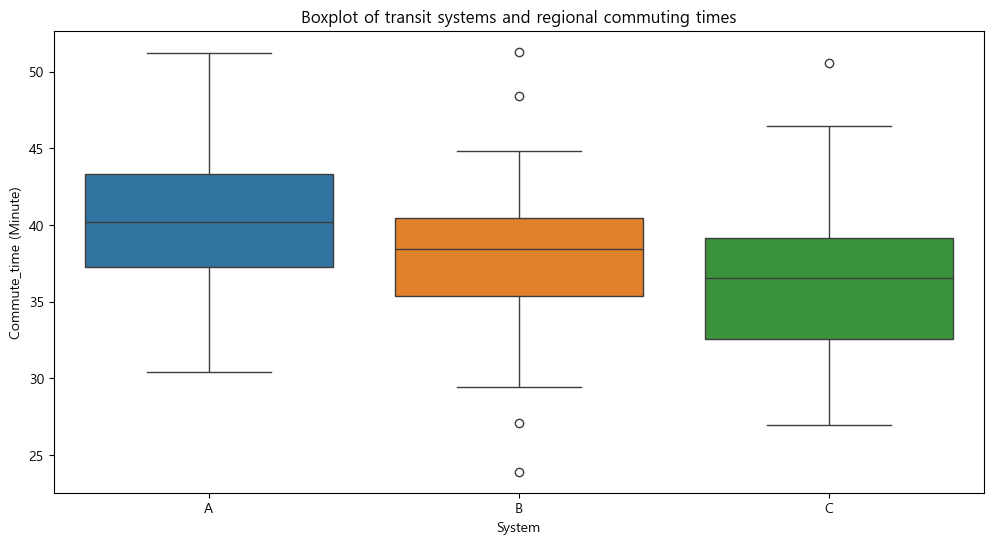

In [28]:
# 박스플롯
plt.figure(figsize=(12, 6))

sns.boxplot(x='System', y='Commute_Time', hue='System', data=df)  
# x축: 교통 시스템, y축: 통근 시간, 그룹: 지역

plt.title('Boxplot of transit systems and regional commuting times')
plt.ylabel('Commute_time (Minute)')
plt.show()

In [29]:
# %%
# 정규성 검정
for (system, location), group in df.groupby(['System', 'Location']):  
    # 두 개의 변수를 기준으로 그룹화
    
    shapiro_test = stats.shapiro(group['Commute_Time'])  
    # 정규성 검정 수행

    print(f"Shapiro-Wilk test ({system}, {location}): p-value = {shapiro_test.pvalue:.4f}")

# 등분산 검정
levene_test = stats.levene(
    df[df['System'] == 'A']['Commute_Time'],
    df[df['System'] == 'B']['Commute_Time'],
    df[df['System'] == 'C']['Commute_Time']
)
# 여러 그룹의 등분산 검정 수행

print(f"Levene’s 등분산 검정 p-value: {levene_test.pvalue:.4f}")

# %%
# Two-Way ANOVA 수행
model = smf.ols('Commute_Time ~ C(System) + C(Location) + C(System):C(Location)', data=df).fit()  
# 독립 변수: System, Location, 상호작용 항 추가

anova_table = sm.stats.anova_lm(model, typ=2)  
# 이원분산분석 수행

print(anova_table)

Shapiro-Wilk test (A, Suburban): p-value = 0.9130
Shapiro-Wilk test (A, Urban): p-value = 0.6868
Shapiro-Wilk test (B, Suburban): p-value = 0.1565
Shapiro-Wilk test (B, Urban): p-value = 0.3654
Shapiro-Wilk test (C, Suburban): p-value = 0.2529
Shapiro-Wilk test (C, Urban): p-value = 0.2481
Levene’s 등분산 검정 p-value: 0.4554
                            sum_sq     df          F    PR(>F)
C(System)               430.972977    2.0   9.518380  0.000119
C(Location)             323.044312    1.0  14.269379  0.000217
C(System):C(Location)    33.709791    2.0   0.744507  0.476475
Residual               3939.183960  174.0        NaN       NaN
